# Compressed sensing project : study of non-negative matrix factorization and online dictionary learning

## First part : non-negative matrix factorization

We wanted here to study Seung & Lee's "Algorithms for Non-negative Matrix Factorization" paper. They propose two types of non-negative factorization (NMF) : one that minimizes a least-squares distance and one that minimizes the Kullback-Leibler divergence (in the case that our initialization matrix is a probability matrix).



In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as lin

__Least square NMF__

Here is the problem setting:

Given a matrix $V$ living in $\mathbb{R}^{n,m}$ we want to find matrices $W\in\mathbb{R}^{n,k}$ and $H\in\mathbb{R}^{k,m}$ solutions of the following minimization problem:

$$
\text{minimize }||V-WH||^2\text{ under constraints } W,H>0
$$


The algorithm, similarly to a classical gradient descent, will start with random W and H. Then we will apply the following update rules allowing us to converge to a local minima (the problem is non convex w.r.t. W,H).

$$
H \leftarrow H\odot(W^TV)\oslash(W^TWH)
$$

$$
W \leftarrow W\odot(VH^T)\oslash(WHH^T)
$$

With $\odot$ standing for element-wise product and $\oslash$ standing for element-wise division

In [61]:
def update_h(V,W,H):
    factor1 = np.dot(W.T,V)
    factor2 = np.dot(np.dot(W.T,W),H)
    return H*factor1/factor2

In [62]:
def update_w(V,W,H):
    factor1 = np.dot(V,H.T)
    factor2 = np.dot(W,np.dot(H,H.T))
    return W*factor1/factor2
        

In [63]:
def error(V,W,H):
    return lin.norm(V-np.dot(W,H))

In [64]:
def non_negative_threshold(Z):
    neg_coefs = Z<0
    Z[neg_coefs] = 0
    return Z

In [77]:
def solver(V,W,H,t=100,verbose=False):
    err=[]
    for i in range(t):
        W_new = update_w(V,W,H)
        W = W_new
        H_new = update_h(V,W,H)
        H = H_new
        if verbose==True:
            print error(V,W,H)
        err.append(error(V,W,H))
    
    return W,H,err

In [84]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
V = dataset.data

n,m = V.shape
k = 150
iterations = 500
H = non_negative_threshold(15+np.random.randn(k, m))
W = non_negative_threshold(15+np.random.randn(n, k))

In [85]:
W,H,err = solver(V,W,H,iterations)


In [73]:
def plot_faces(faces, n_rows=4, n_cols=8, label=True):
    plt.figure(figsize=(14, 10))
    n_rows, n_cols = 4, 8
    face_shape = (50, 37)
    for k, flat_face in enumerate(faces):
        if k >= n_rows * n_cols:
            break
        face = flat_face.reshape(face_shape)
        plt.subplot(n_rows, n_cols, k+1)
        plt.imshow(face, cmap=plt.cm.gray, interpolation='none')
        plt.xticks(())
        plt.yticks(())
        if label:
            plt.title(target_names[y[k]], size=10)

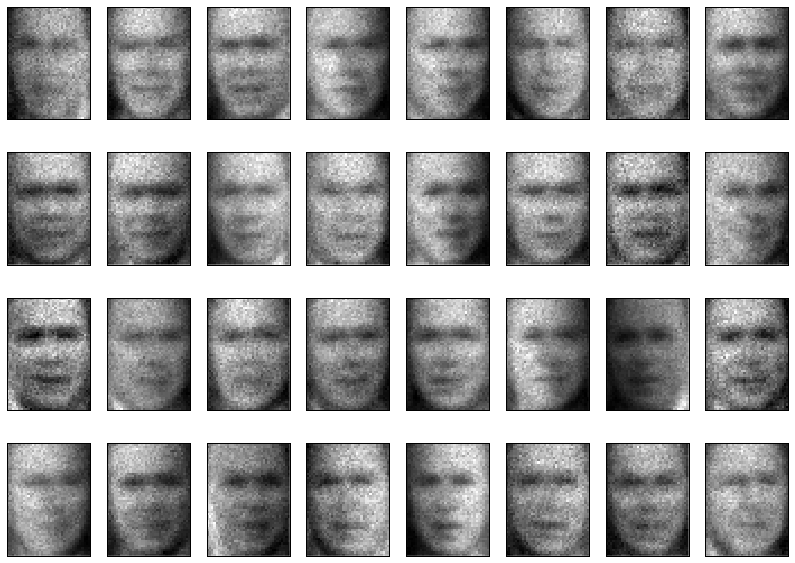

In [75]:
plot_faces(H,label=False)

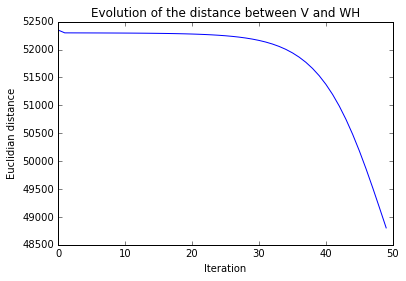

In [83]:
plt.plot(np.arange(len(err)),err)
plt.xlabel("Iteration")
plt.ylabel("Euclidian distance")
plt.title("Evolution of the distance between V and WH")